# Part I - (Dataset Exploration Title)
## by Abdul-rasaq Wasiu

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [374]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [375]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### What is the structure of your dataset?

There are 183412 rides in the dataset which consist of categorical variable majorly and few numerical variable like duration in seconds. 


### What is/are the main feature(s) of interest in your dataset?

 I want to know the performance and participation of the categorical variable like the member genders, user type, bike id ,bike shared during the trip and ride period. And also features that best describe the duration in seconds.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Numeric variable like duration sec, distance calculated from latitude and longitude and age from member birth year will help to determine the performance of the categorical variable. Also determining the factor affecting duration of each trip, other numerical variable will be required.

In [376]:
print(df.shape)
print(df.dtypes)
df.head()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Data Cleaning

In [377]:
# Determing the number of variable with null
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [378]:
# dropping the observations with na
df.dropna(inplace = True)

In [379]:
#Checking .....
df.info()

#Good no null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### Creating more variabes from the data

More variables like distance,speed, age can be created from the given data. This will give help to give instance about the data.
With the distance known from latitude and longitude, it will help to determine how far each biker moved and the average speed for the journey.

In [380]:
#creating age variable
df['age'] = 2019 - df['member_birth_year']

# using 2019 as when the data was collected

In [381]:
#checking.....
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,23.0
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,35.0
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,29.0
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,31.0


In [382]:
#Creating variable for distance in km from latitude, longitude
import numpy as np
def haversine(lat1, lon1, lat2, lon2):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
   
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return 6371 * 2 * np.arcsin(np.sqrt(a))

In [383]:
# Considering lat1 as start_station_latitude, lon1 as start_station_longitude, lat2 as end_station_latitude 
# and lon2 as end_station_longitude
df['distance_km'] = df.apply(lambda x: haversine(x['start_station_latitude'],x['start_station_longitude'],
                                              x['end_station_latitude'],x['end_station_longitude']),axis=1)
# distance in km

In [384]:
#checking......
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance_km
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,0.544709
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,2.704545
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,0.260739
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,2.409301
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,3.332203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,23.0,1.464766
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,35.0,1.402716
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,29.0,0.379066
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,31.0,0.747282


In [385]:
df['average_speed_km/h'] = df['distance_km']/(df['duration_sec']/(60*60))

In [386]:
# It will be nice to check the correctness of the duration_sec
from datetime import datetime
# convert start_time and end_time to datetime
df.start_time = df.start_time.astype('datetime64[ns]')
df.end_time = df.end_time.astype('datetime64[ns]')
# the difference in the time
df['time_interval'] = df.end_time - df.start_time
# converting to seconds
df['time_interval']=df['time_interval'].dt.total_seconds()

In [387]:
# comparing both now
df[np.abs(df.time_interval-df.duration_sec) > 1]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance_km,average_speed_km/h,time_interval


In [388]:
# Good !!! the duration_sec is correct. then let's drop the created time_interval column
df.drop('time_interval',axis=1,inplace = True)

In [389]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance_km,average_speed_km/h
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,0.544709,0.037577
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,2.704545,0.157409
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,0.260739,0.025724
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,2.409301,5.472230
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,3.332203,6.690424


In [390]:
# Creating a column for classifying the start time into days of the week
df['start_day'] = df.start_time.dt.strftime("%A")
df['end_day'] = df.end_time.dt.strftime("%A")

In [391]:
# Classifying variable into categorical or numerical
cat_variable = {'start_station_name': list(df.start_station_name.unique()),
               'end_station_name' : list(df.end_station_name.unique()),
                'user_type' : list(df.user_type.unique()),
                'member_gender' : list(df.member_gender.unique()),
                'bike_share_for_all_trip' : list(df.bike_share_for_all_trip.unique()),
                'end_station_id' : list(df.end_station_id.unique()),
                'bike_id': list(df.bike_id.unique()),
                'start_day': list(df.start_day.unique()),
               'end_day': list(df.end_day.unique())}

# Changing the data type to catagorical
for var in cat_variable:
    ord_var = pd.api.types.CategoricalDtype(categories = cat_variable[var], ordered= True)
    df[var] = df[var].astype(ord_var)

# Numerical variable list
num_variable = ['duration_sec','start_station_lat','start_station_long','end_station_lat','end_station_long','member_birth_year','age','distance_km','average_speed_km/h']


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


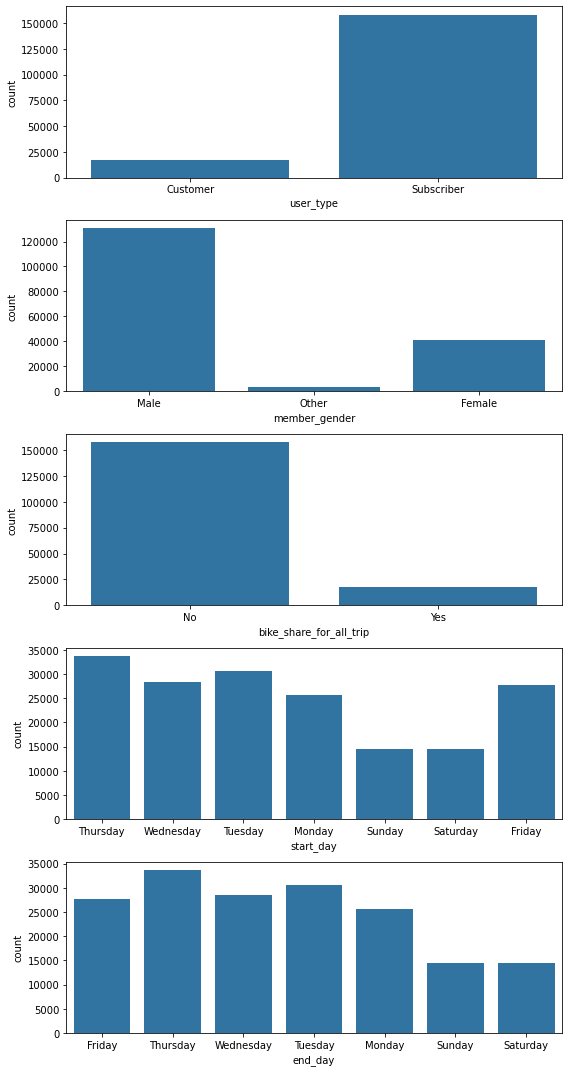

In [392]:
# Countplot for the different categorical variable
fig , ax = plt.subplots(nrows = 5, figsize = [8,15])
cat_var = ['user_type','member_gender','bike_share_for_all_trip','start_day','end_day']
default_color = sb.color_palette()[0]

for i in range(len(cat_var)):
    var = cat_var[i]
    sb.countplot(data = df, x = var, color = default_color, ax = ax[i]);

    

This show that most of the ride were done by Male with more than 70,000 difference with Female while Other gender have the least ride. As an investor you can do more to lure female to ride bike. Many biker are Subscribers while only few are Customers. Likewise only few people share bike during the trip against many that doesn't share. Most trip start and end on Thursday while Sunday seems the day people end the trip. 

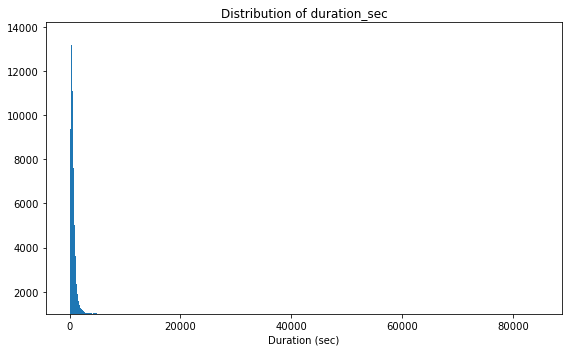

In [393]:
# knowing the distribution of duration_sec
binsize = 50
plt.figure(figsize = [8,5])
bins = np.arange(0,df.duration_sec.max()+binsize,binsize)
plt.hist(data = df, x = 'duration_sec', bins = bins, bottom = 1000)
plt.xlabel('Duration (sec)')
plt.title('Distribution of duration_sec');


Ooops!!! The data contain outliers, therefore it will be nice to treat the the outliers.


In [395]:
# finding the upper and lower outliers
upp_outliers = np.percentile(df.duration_sec,99)
low_outliers = np.percentile(df.duration_sec,1)
print(upp_outliers,low_outliers)

3176.0 104.0


In [396]:
# Removing the upper and lower outliers
df = df[(low_outliers > df['duration_sec']) | (df['duration_sec'] < upp_outliers)]


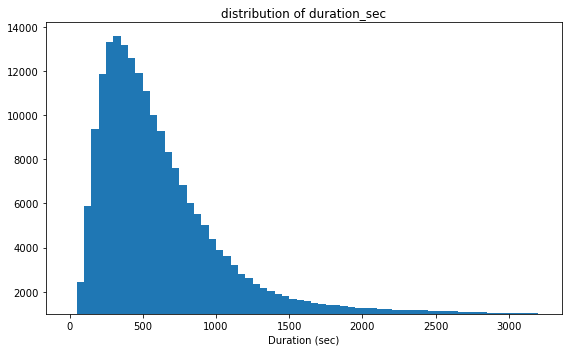

In [397]:
# knowing the distribution of duration_sec after treating outliers issues
binsize = 50
plt.figure(figsize = [8,5])
bins = np.arange(0,df.duration_sec.max()+binsize,binsize)
plt.hist(data = df, x = 'duration_sec', bins = bins, bottom = 1000)
plt.xlabel('Duration (sec)')
plt.title('distribution of duration_sec')
plt.show()

Most of the duration for the trip is roughly 400 sec with trips of roughly 13000. It is skewed to the right with mode less than median and mean. Most biker covered roughly less than 500. 

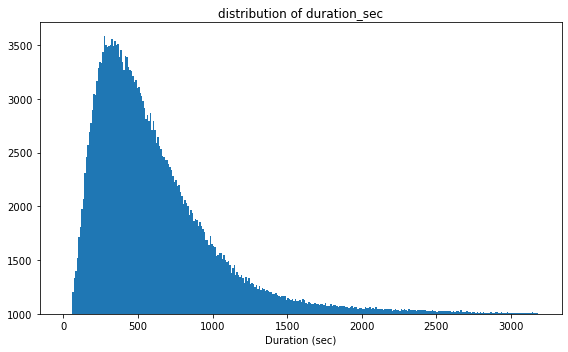

In [398]:
# Getting a smaller bins of the distribution
binsize = 10
plt.figure(figsize = [8,5])
bins = np.arange(0,df.duration_sec.max()+binsize,binsize)
plt.hist(data = df, x = 'duration_sec', bins = bins, bottom = 1000)
plt.xlabel('Duration (sec)')
plt.title('Distribution of duration_sec')
plt.show()

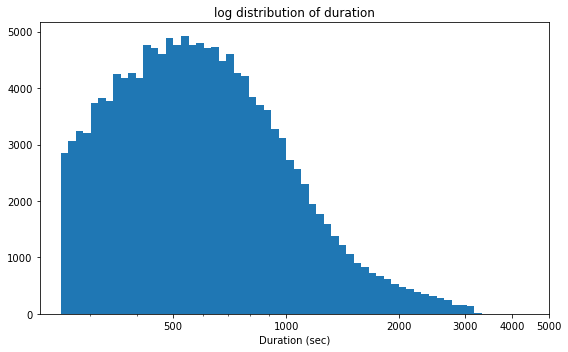

In [410]:
# let's view log distribution of duration
log_binsize = 0.02
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 4e3,5e3], [500, '1000', '2000','3000','4000','5000'])
plt.xlabel('Duration (sec)')
plt.title('log distribution of duration')
plt.show()

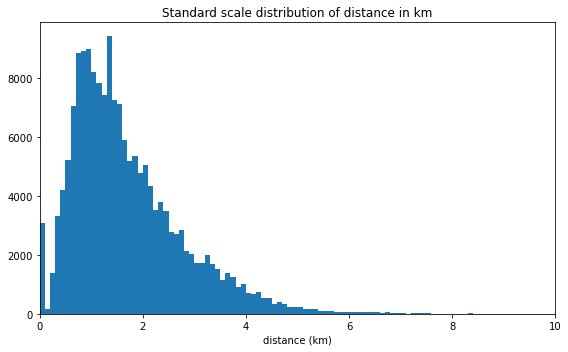

In [401]:
# viewing the standard scale distribution of distance in km
binsize = 0.1
plt.figure(figsize = [8,5])
bins = np.arange(0,df.distance_km.max()+binsize,binsize)
plt.hist(data = df, x = 'distance_km', bins = bins)
plt.xlabel('distance (km)')
plt.xlim([0,10])
plt.title('Standard scale distribution of distance in km')
plt.show()

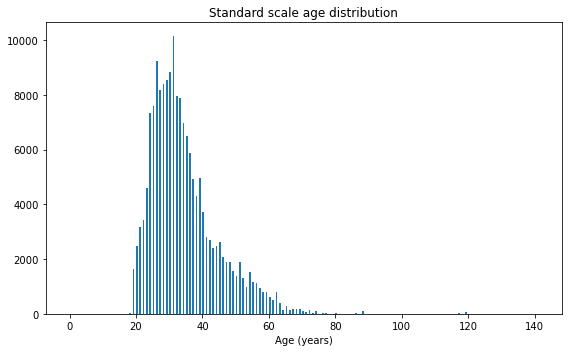

In [402]:
# Standard scale age distribution 
binsize = 0.5
plt.figure(figsize = [8,5])
bins = np.arange(0,df.age.max()+binsize,binsize)
plt.hist(data = df, x = 'age', bins = bins)
plt.xlabel('Age (years)')
plt.title('Standard scale age distribution');

In [403]:
# using 0.1 and 99.9 percentile as the lower and upper outlier respectively
upp_outliers = np.percentile(df.age,99.9)
low_outliers = np.percentile(df.age,0.1)
print(upp_outliers,low_outliers)

86.0 19.0


In [404]:
# Removing the outliers
df = df[(low_outliers > df['age']) | (df['age'] < upp_outliers)]

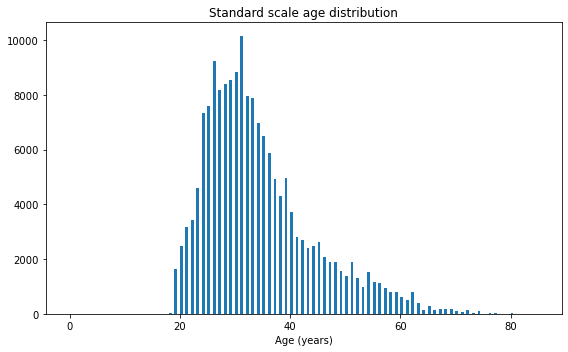

In [406]:
# Age distribution 
binsize = 0.5
plt.figure(figsize = [8,5])
bins = np.arange(0,df.age.max()+binsize,binsize)
plt.hist(data = df, x = 'age', bins = bins)
plt.xlabel('Age (years)')
plt.title('Standard scale age distribution');

Most of the riders falls between 20 and 40 years and absolutely none for 0 and 20 years. 
Elderly people participated in the ride. About 10000 riders are 32 years of age. 

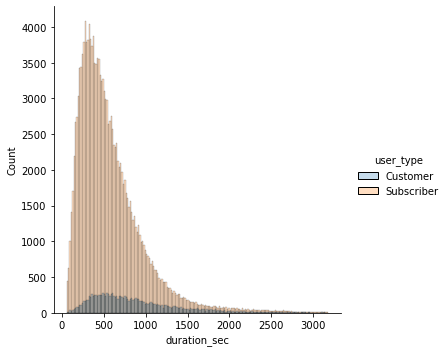

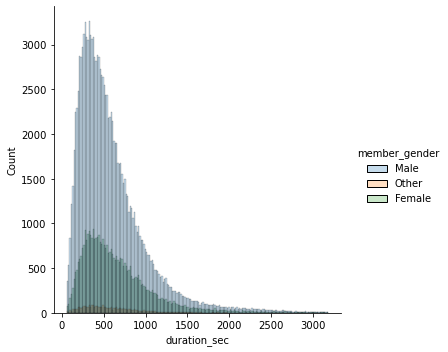

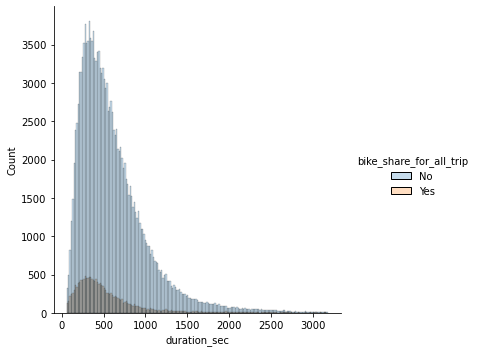

In [307]:
# Comparing duration the distribution by catogorical variable
sb.displot(data = df, x = 'duration_sec', hue = 'user_type', alpha = .25)
sb.displot(data = df, x = 'duration_sec', hue = 'member_gender', alpha = .25)
sb.displot(data = df, x = 'duration_sec', hue = 'bike_share_for_all_trip', alpha = .25);

 In the user type category, the Subscriber has the largest count with 90% of it ranges from 0 to 2500 sec and customer has flat curves at such range
The male - duration is bimodal with a high distribution which is skewed to the right while Other and Female distributions are flat. All the distribution has less than 500 sec has the mode.


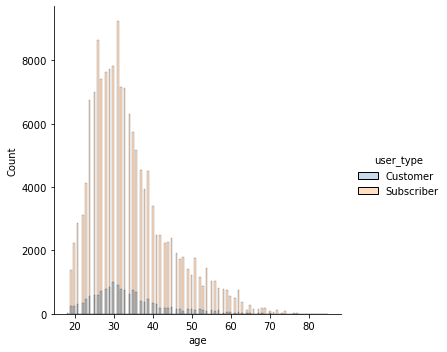

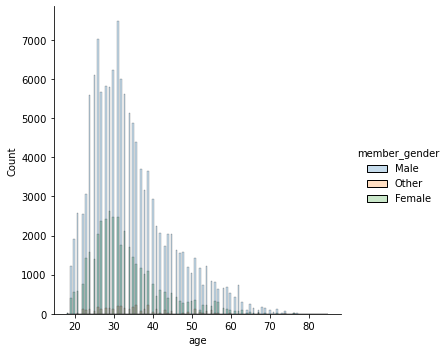

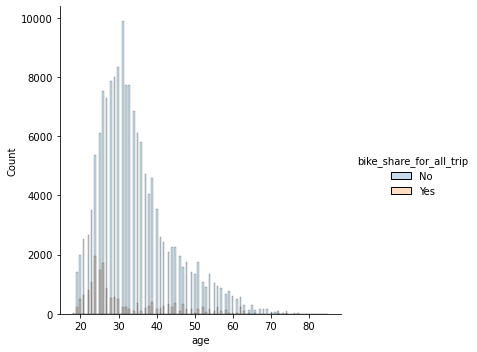

In [309]:
# Comparing the age distribution by catogorical variable
sb.displot(data = df, x = 'age', hue = 'user_type', alpha = .25)
sb.displot(data = df, x = 'age', hue = 'member_gender', alpha = .25)
sb.displot(data = df, x = 'age', hue = 'bike_share_for_all_trip', alpha = .25);


32 years old people mostly don't share bike for all trip while 25 year old people has the highest frequency of sharing bike during the trip.
The shape of the male and female age distribution are likely similar. while other dstribution is not well define. This also show the presence of the non popular gender in the race.

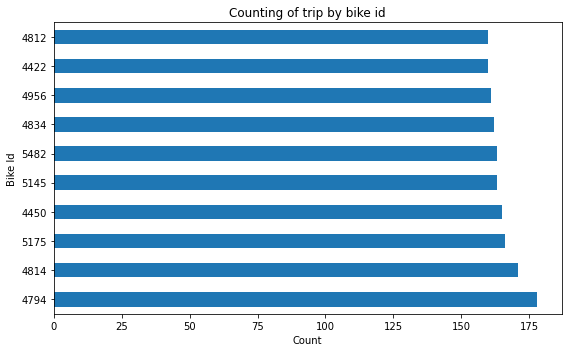

In [438]:
# Counting of trip by bike id
plt.figure(figsize = [8,5])
df['bike_id'].value_counts().head(10).plot(kind = 'barh');
plt.ylabel('Bike Id')
plt.xlabel('Count')
plt.title('Counting of trip by bike id');

In [ ]:
4794 

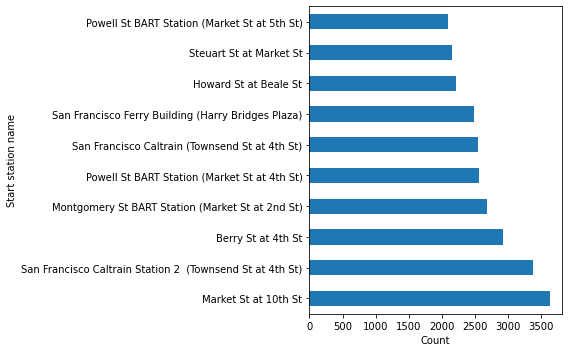

In [434]:
# counting of trip by start station
plt.figure(figsize = [8,5])
df['start_station_name'].value_counts().head(10).plot(kind = 'barh')
plt.ylabel('Start station name')
plt.xlabel('Count');

Market st at 10th St leads other start station and the least among the 10 highest trip station is Powell st BART Station. 

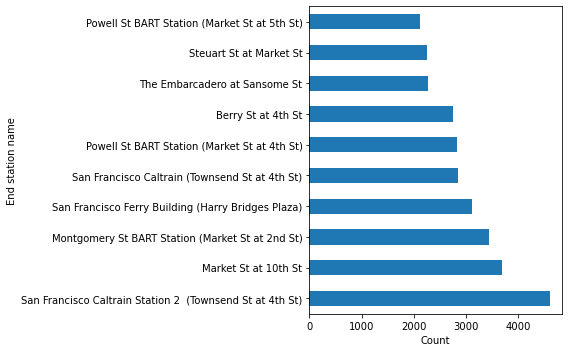

In [435]:
# Counting of trip by end station
plt.figure(figsize = [8,5])
df['end_station_name'].value_counts().head(10).plot(kind = 'barh')
plt.ylabel('End station name')
plt.xlabel('Count');

 San Francisco Caltrain Station 2 (Townsend St at 4th St) leads other start station and the least among the 10 highest trip station is Powell st BART Station. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Due to the large difference in values of duration_sec variable, I did log transformation which shows that between 500 and 100 secs have the peak of the data. And also I removed the outliers in the data which gives a clearer view of the data.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Among the investigated features, outliers were observed in the ages and removed. It's rarely possible for people in such age to participate in the trip. So therefore it will be appropriate to remove the observation in such ages.  

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

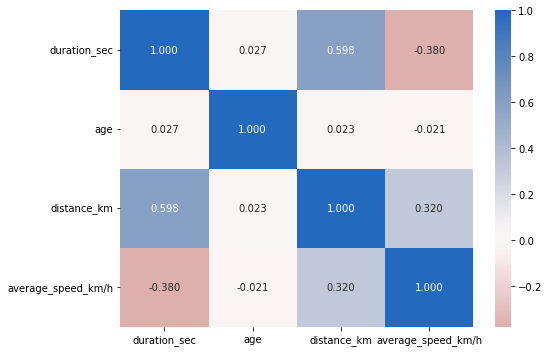

In [343]:
num_variable = ['duration_sec','age','distance_km','average_speed_km/h']
plt.figure(figsize = [8, 5])
sb.heatmap(df[num_variable].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

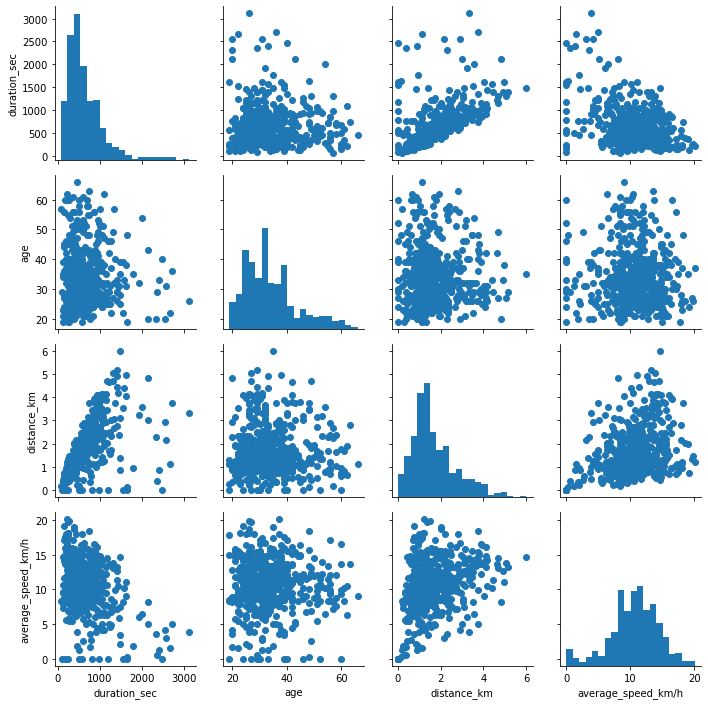

In [344]:
df_sample = df.sample(n=500, replace= False)
g = sb.PairGrid(data = df_sample, vars = num_variable)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

<Figure size 720x720 with 0 Axes>

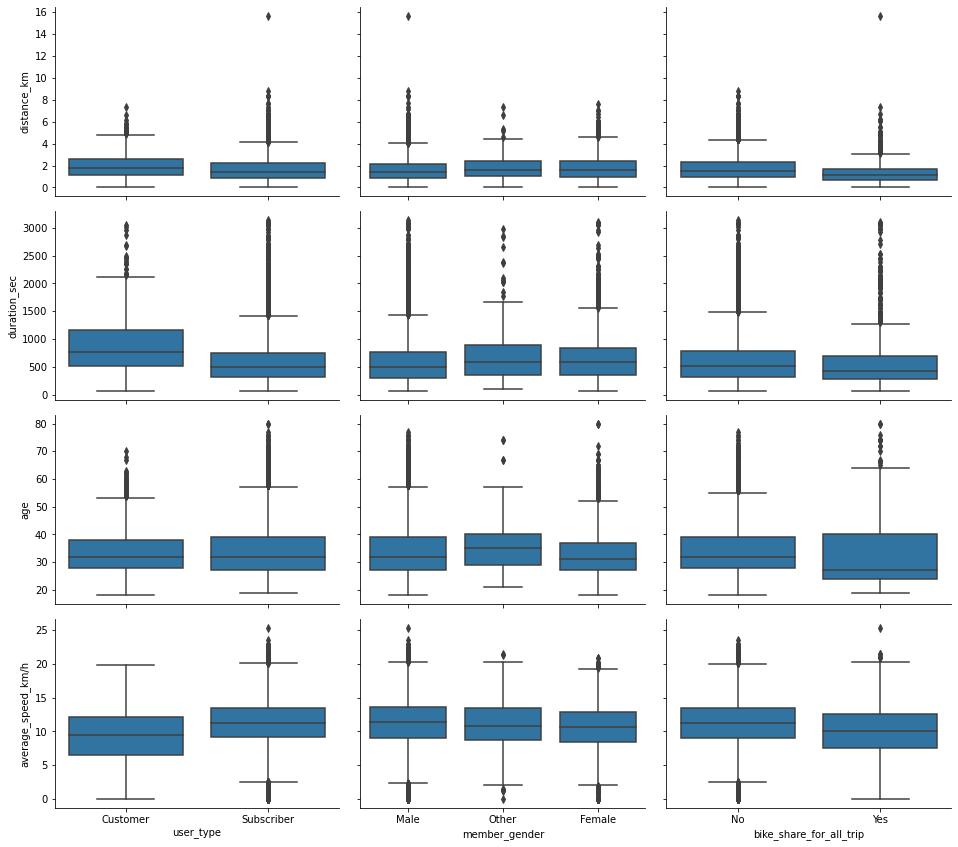

In [412]:
df_sample = df.sample(n = 10000, replace =False)
def boxgrib(x,y,**kwargs):
    default_col = sb.color_palette()[0]
    sb.boxplot(x=x, y=y,color = default_col)
    
plt.figure(figsize =[10,10])
g = sb.PairGrid(data = df_sample, y_vars = ['distance_km','duration_sec','age','average_speed_km/h'],x_vars = ['user_type','member_gender','bike_share_for_all_trip'],height = 3, aspect = 1.5)
g.map(boxgrib);

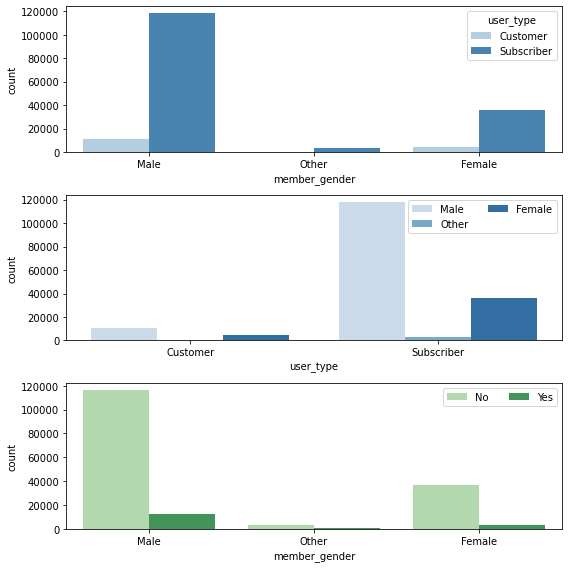

In [414]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'user_type', hue = 'member_gender', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

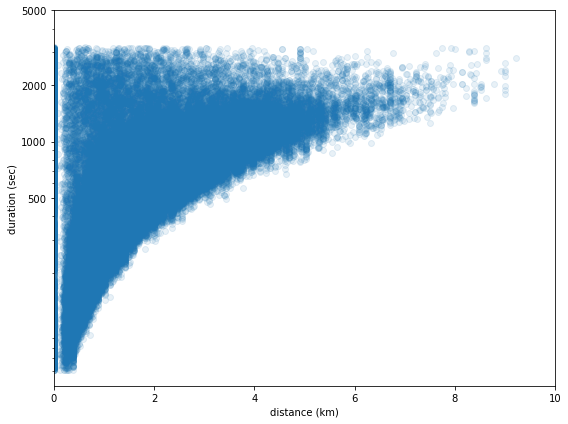

In [416]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'distance_km', y = 'duration_sec', alpha = 1/10)
plt.xlim([0, 10])
plt.xlabel('distance (km)')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3], [500, '1000', '2000', '5000'])
plt.ylabel('duration (sec)');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Only distance_km has the best positive correlation with the duration. other numerical variable like does not correlate with greatly like distance or doesn't correlate with duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No correlation between the other features as shown above.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [421]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3
    
df['cr_distance_km'] = df['distance_km'].apply(cuberoot_trans)

In [422]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

In [423]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df['log_duration_sec'] = df['duration_sec'].apply(log_trans)

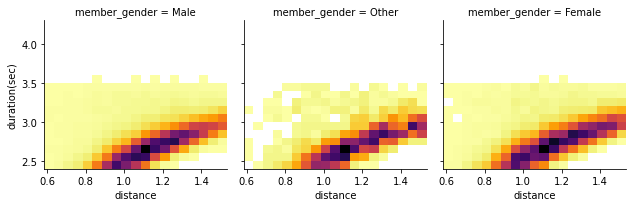

In [424]:
g = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'cr_distance_km', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('distance')
g.set_ylabels('duration(sec)')

plt.show()

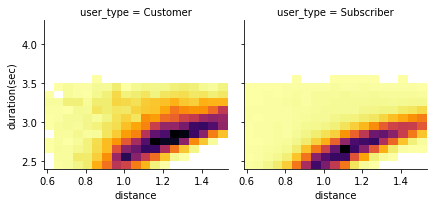

In [425]:
g = sb.FacetGrid(data = df, col = 'user_type',  col_wrap = 3, height = 3)
g.map(hist2dgrid, 'cr_distance_km', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('distance')
g.set_ylabels('duration(sec)')

plt.show()

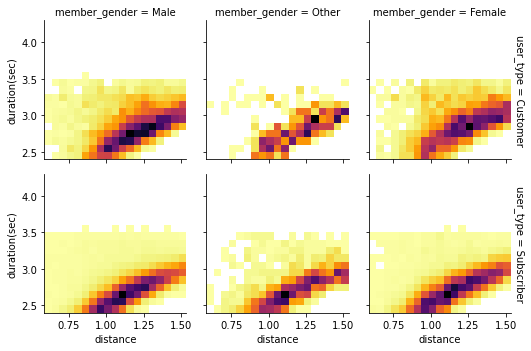

In [428]:
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', height = 2.5,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)], margin_titles = True)
g.map(hist2dgrid, 'cr_distance_km', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('distance')
g.set_ylabels('duration(sec)')

plt.show()

In [ ]:
g = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'cr_distance_km', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('distance')
g.set_ylabels('duration(sec)')

plt.show()

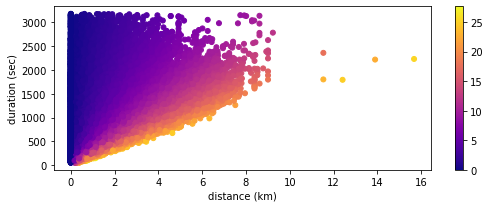

In [419]:
plt.rcParams['figure.figsize'] = [7.50,3.0]
plt.rcParams['figure.autolayout'] = True

fig , ax = plt.subplots()

s = ax.scatter(df['distance_km'],df['duration_sec'], c = df['average_speed_km/h'], s= 100, marker = '.',cmap = 'plasma')
fig.colorbar(s)
plt.ylabel('duration (sec)')
plt.xlabel('distance (km)');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation to the correlation of distance and duration with different classification. It shows that duration is mildly correlated with distance and duration. 

### Were there any interesting or surprising interactions between features?

No, 

## Conclusions
Only distance show a correlation show a positive correlation with duration and it shows similar correlation along the classification.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

